In [51]:
import numpy as np
import pandas as pd
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
labels = pd.read_csv('./label_names.csv')

In [4]:
labels.head(10)

,label_id,label_name
0,0,Games
1,1,Vehicle
2,2,Video game
3,3,Concert
4,4,Car
5,5,Dance
6,6,Animation
7,7,Musician
8,8,Football
9,9,Music video


In [11]:
videos = pd.read_csv('./train_labels.csv', header=None)

In [14]:
videos.columns = ['video_id', 'labels']

In [15]:
videos.head(10)

,video_id,labels
0,--DwgB78t-c,16 5 430
1,--NZRkXBV7k,128 3 39 7 44 13 16 30
2,--hoQ2sGG4M,694
3,--ABhs9ik7c,2232 1 4 517 270
4,--sBoaqBlzA,45 125
5,--7h1S4neDM,0 48 10 356
6,--F672jfCMo,488 1067 1078
7,--ezS5q-mZg,1 962 12 625
8,--XT8O4T3Wc,379 6
9,--Qgwg7mGZY,0 33 2 2379 3423


In [18]:
test_series = videos['labels'].head(20).apply(lambda s: s.split(" "))

In [19]:
test_series.values

array([['16', '5', '430'], ['128', '3', '39', '7', '44', '13', '16', '30'],
       ['694'], ['2232', '1', '4', '517', '270'], ['45', '125'],
       ['0', '48', '10', '356'], ['488', '1067', '1078'],
       ['1', '962', '12', '625'], ['379', '6'],
       ['0', '33', '2', '2379', '3423'],
       ['768', '37', '72', '330', '331', '29', '373', '23', '189'], ['20'],
       ['0', '2', '836', '432', '665', '2779'], ['118'], ['6'],
       ['1', '114', '1395', '4', '3409'], ['276'], ['1206', '6', '967'],
       ['9'], ['5', '31']], dtype=object)

In [38]:
all_labels = list(chain.from_iterable(videos['labels'].apply(lambda s: s.split(" ")).values))

In [39]:
len(all_labels)

16639392

In [41]:
cnt = Counter(all_labels)

In [43]:
len(cnt.keys())

4716

In [44]:
cnt.most_common()

[('0', 859519),
 ('1', 678257),
 ('2', 518981),
 ('3', 494707),
 ('4', 371391),
 ('5', 303295),
 ('6', 296624),
 ('7', 295199),
 ('8', 217920),
 ('9', 214887),
 ('10', 202073),
 ('11', 196804),
 ('12', 195310),
 ('13', 169704),
 ('14', 162048),
 ('15', 161089),
 ('16', 159726),
 ('17', 119952),
 ('18', 109582),
 ('19', 106519),
 ('20', 96490),
 ('21', 94418),
 ('22', 92185),
 ('23', 89874),
 ('24', 85567),
 ('25', 84609),
 ('26', 84323),
 ('28', 83789),
 ('27', 83730),
 ('29', 81896),
 ('30', 78544),
 ('31', 73917),
 ('32', 72524),
 ('33', 72133),
 ('34', 68156),
 ('35', 66591),
 ('36', 63601),
 ('37', 60669),
 ('38', 60124),
 ('39', 59004),
 ('40', 58713),
 ('41', 58654),
 ('43', 58481),
 ('42', 58338),
 ('45', 57374),
 ('44', 57300),
 ('46', 56559),
 ('47', 55210),
 ('48', 52328),
 ('49', 52169),
 ('50', 49773),
 ('52', 49554),
 ('51', 49379),
 ('53', 48472),
 ('54', 47320),
 ('55', 47171),
 ('56', 47048),
 ('58', 45965),
 ('57', 45787),
 ('59', 44648),
 ('60', 43467),
 ('61', 43247)

In [45]:
counts = labels['label_id'].apply(lambda x: cnt[str(x)])

In [47]:
counts.head(10)

0    859519
1    678257
2    518981
3    494707
4    371391
5    303295
6    296624
7    295199
8    217920
9    214887
Name: label_id, dtype: int64

In [48]:
labels['count'] = counts

In [49]:
labels.head(10)

,label_id,label_name,count
0,0,Games,859519
1,1,Vehicle,678257
2,2,Video game,518981
3,3,Concert,494707
4,4,Car,371391
5,5,Dance,303295
6,6,Animation,296624
7,7,Musician,295199
8,8,Football,217920
9,9,Music video,214887


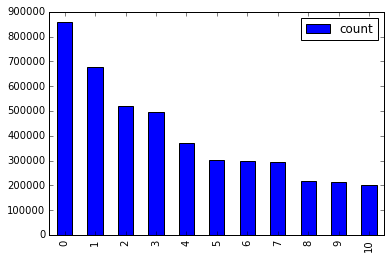

In [77]:
labels.ix[:10, 1:].plot.bar()